# Цели работы

1) Рассчитать теплоемкость газа (аргона) Леннард-Джонса методом молекулярной динамики в ансамбле NVT.
2) Получить зависимость полной энергии газа Леннард-Джонса от температуры.
3) Получить зависимость теплоемкости как производной полной энергии по температуре от
температуры.
4) Получить зависимость теплоемкости, рассчитанной через флуктуации полной энергии от
температуры.
5) Сравнить полученные значения между собой.
6) Сверить полученные значения с  экспериментальными.

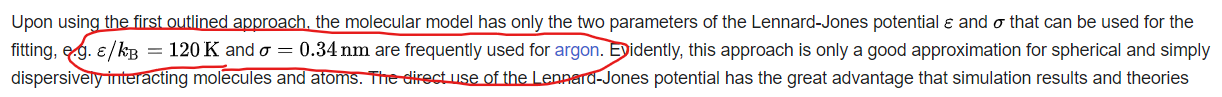

In [7]:
import random
import math
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import tqdm
import pandas as pd
from scipy.optimize import curve_fit

# Зависимость полной энергии газа Леннард-Джонса от температуры.

In [6]:
df = pd.read_csv("results.txt", sep=',')
df.info()
T = df['T']
E = df['Tot_en']
C_diff = df['Heat_cap_diff']
C_fluct = df['Heat_cap_fluct']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   T               9 non-null      int64  
 1   Tot_en          9 non-null      float64
 2   Heat_cap_diff   9 non-null      float64
 3   Heat_cap_fluct  9 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 416.0 bytes


In [9]:
f = lambda x, k, b: k*x + b
(k, b), _ = curve_fit(f, T, E)

(12.440198700358186, -4.3373093259014155)

Text(0.5, 1.0, 'Зависимость полной энергии от температуры')

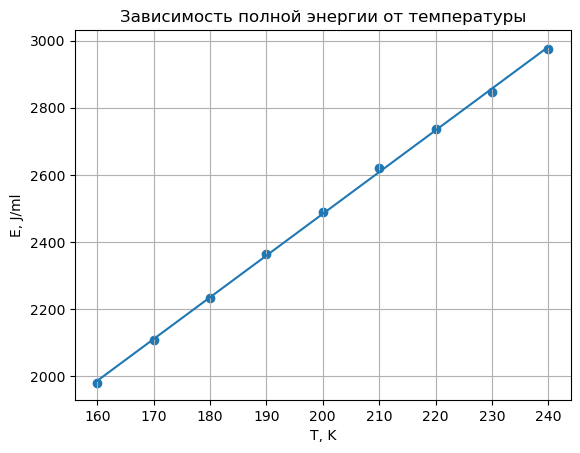

In [12]:
plt.scatter(T, E)
plt.plot(T, k*T + b)
plt.grid(True)
plt.xlabel('T, K')
plt.ylabel('E, J/ml')
plt.title('Зависимость полной энергии от температуры')

# Зависимость теплоемкости как производной полной энергии по температуре от температуры.

In [18]:
E = np.array(E)
T = np.array(T)

In [19]:
dE = E[1:] - E[:-1]
dT = T[1:] - T[:-1]
C = dE/dT

In [21]:
C_mean = np.mean(C)
C_mean

12.45400879814525

Text(0.5, 1.0, 'Зависимость дифференциальной теплоёмкости от температуры')

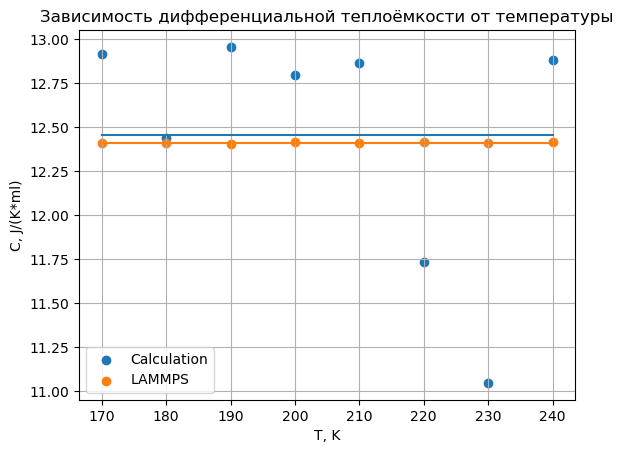

In [50]:
plt.scatter(T[1:], C, label='Calculation')
plt.scatter(T[1:], C_diff[1:], label='LAMMPS')
plt.plot(T[1:], np.zeros(len(T)-1)+C_mean)
plt.plot(T[1:], np.zeros(len(T)-1)+np.mean(C_diff))
plt.grid(True)
plt.xlabel('T, K')
plt.ylabel('C, J/(K*ml)')
plt.legend(loc='best')
plt.title('Зависимость дифференциальной теплоёмкости от температуры')

# Зависимость теплоемкости, рассчитанной через флуктуации полной энергии от температуры.

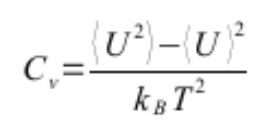

Рассчет реализован в in.melt и выведен в results.txt

In [43]:
C_fluct_mean = np.mean(C_fluct)
C_fluct_mean

11.13813089722255

Text(0.5, 1.0, 'Зависимость флуктуационной теплоёмкости от температуры')

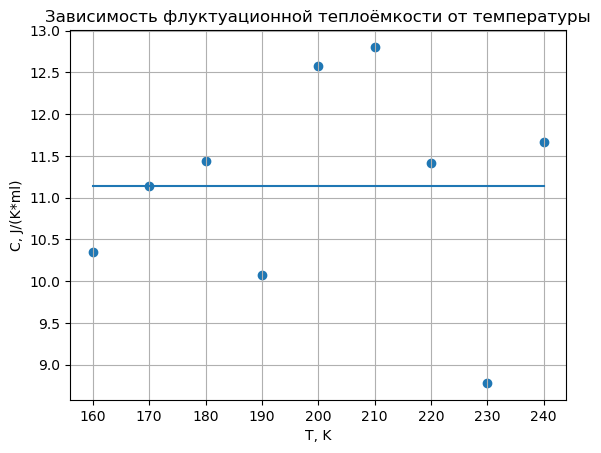

In [42]:
plt.scatter(T, C_fluct)
plt.plot(T, np.zeros(len(T))+C_fluct_mean)
plt.grid(True)
plt.xlabel('T, K')
plt.ylabel('C, J/(K*ml)')
# plt.legend(loc='best')
plt.title('Зависимость флуктуационной теплоёмкости от температуры')

# Сравнение

Дифференциальная теплоемкость оказалась выше, чем флуктуационная:
12.45 vs 11.14 

Плато на графике зависимости дифференциальной теплоемкости от температуры рассчетов на ламмпсе говорит о том, что при рассматриваемых температурах активированы лишь поступательные степени свободы. То есть в этом диапазоне молярная теплоемкость постоянна и рассчитывается по формуле:

In [48]:
C_tab = 3/2 * 8.31
C_tab

12.465

Это значение до сотых долей совпадает со средним значением, рассчитаным по результатам мд в ноутбуке и мд в ламмпсе